In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head(10)

,Ranking,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
# data cleaning - removing missing rows in year and sales
df.dropna(subset=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)

In [9]:
df.loc[:, 'Year'] = df['Year'].astype(int)
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in numeric_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')


df.dropna(subset=numeric_cols, inplace=True)

# **1. Total number of games in the dataset**

In [10]:
total_games = len(df)
print(f"Total number of games: {total_games}")

Total number of games: 16327


# **2. Top 10 globally selling games**

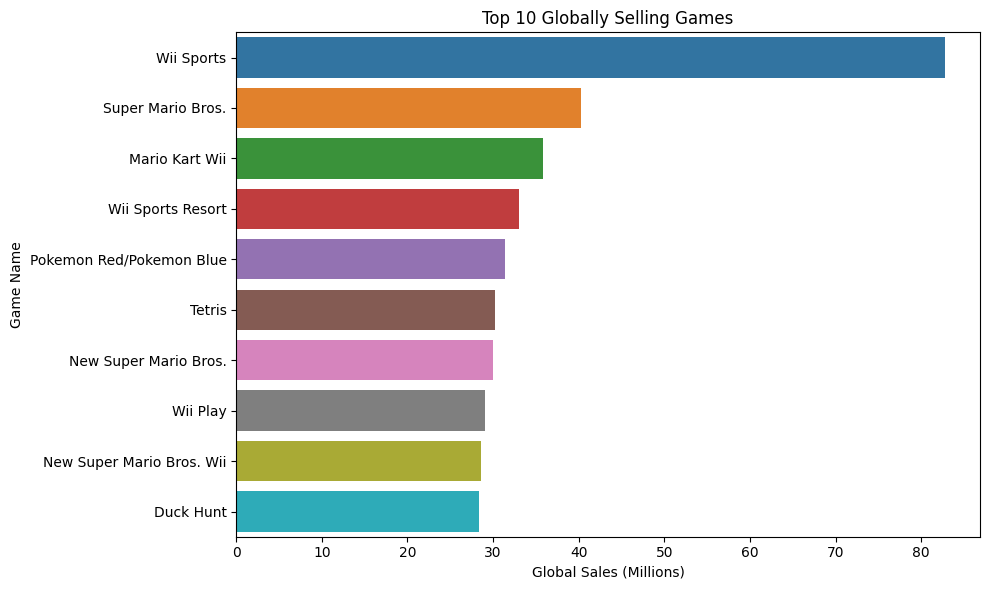


Top 10 Globally Selling Games:
  Ranking                      Name Platform  Year        Genre  Global_Sales
       1                Wii Sports      Wii  2006       Sports         82.74
       2         Super Mario Bros.      NES  1985     Platform         40.24
       3            Mario Kart Wii      Wii  2008       Racing         35.82
       4         Wii Sports Resort      Wii  2009       Sports         33.00
       5  Pokemon Red/Pokemon Blue       GB  1996 Role-Playing         31.37
       6                    Tetris       GB  1989       Puzzle         30.26
       7     New Super Mario Bros.       DS  2006     Platform         30.01
       8                  Wii Play      Wii  2006         Misc         29.02
       9 New Super Mario Bros. Wii      Wii  2009     Platform         28.62
      10                 Duck Hunt      NES  1984      Shooter         28.31


In [11]:
top_10_global = df[['Ranking', 'Name', 'Platform', 'Year', 'Genre', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_global, x='Global_Sales', y='Name', hue='Name')
plt.title('Top 10 Globally Selling Games')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game Name')
plt.tight_layout()
plt.show()
print("\nTop 10 Globally Selling Games:\n", top_10_global.to_string(index=False))

# **3. Total sales by region**

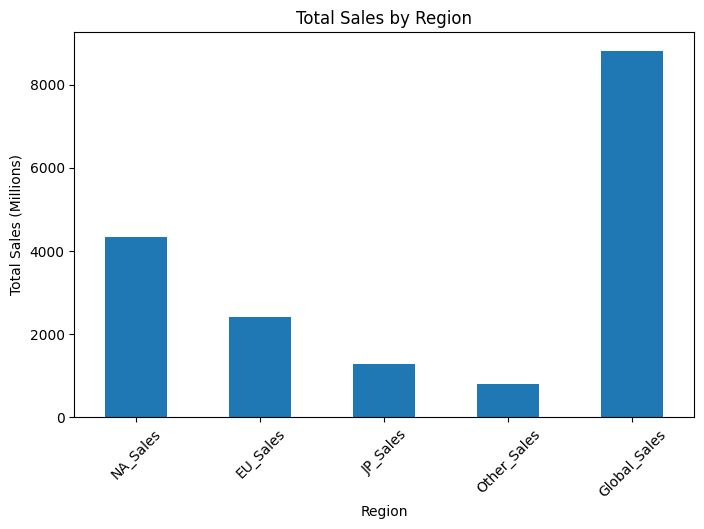


Total Sales by Region:
 NA_Sales        4333.43
EU_Sales        2409.12
JP_Sales        1284.30
Other_Sales      789.01
Global_Sales    8820.36
dtype: float64


In [12]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()
print("\nTotal Sales by Region:\n", region_sales)

# 4. Top 5 games sold in North **America**

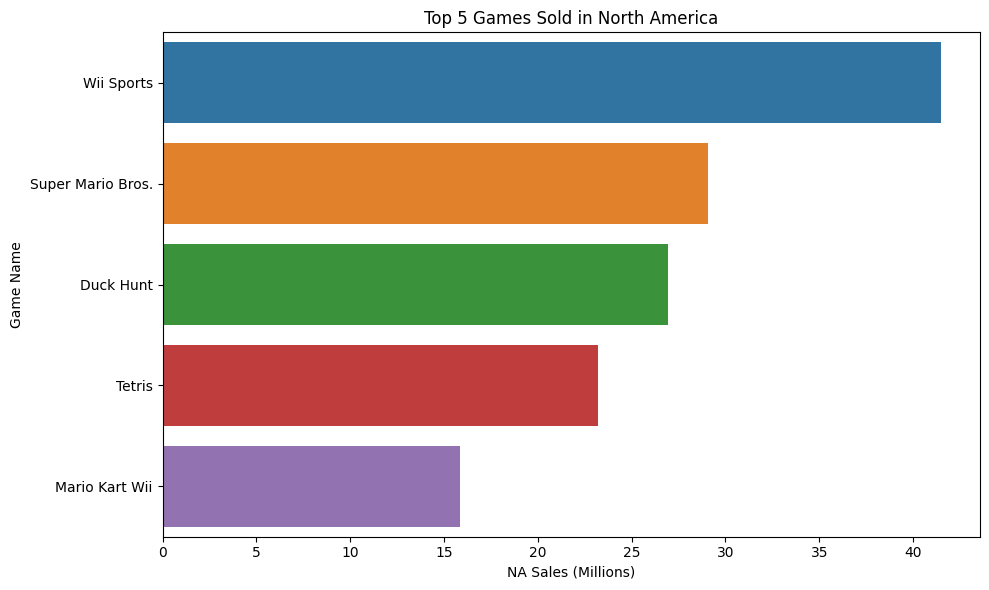


Top 5 Games Sold in North America:
  Ranking              Name Platform  Year    Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
       1        Wii Sports      Wii  2006   Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
       2 Super Mario Bros.      NES  1985 Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
      10         Duck Hunt      NES  1984  Shooter  Nintendo     26.93      0.63      0.28         0.47         28.31
       6            Tetris       GB  1989   Puzzle  Nintendo     23.20      2.26      4.22         0.58         30.26
       3    Mario Kart Wii      Wii  2008   Racing  Nintendo     15.85     12.88      3.79         3.31         35.82


In [13]:
top_5_na = df.sort_values(by='NA_Sales', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_na, x='NA_Sales', y='Name', hue='Name')
plt.title('Top 5 Games Sold in North America')
plt.xlabel('NA Sales (Millions)')
plt.ylabel('Game Name')
plt.tight_layout()
plt.show()
print("\nTop 5 Games Sold in North America:\n", top_5_na.to_string(index=False))

# **5. Top 5 games sold in Japan**

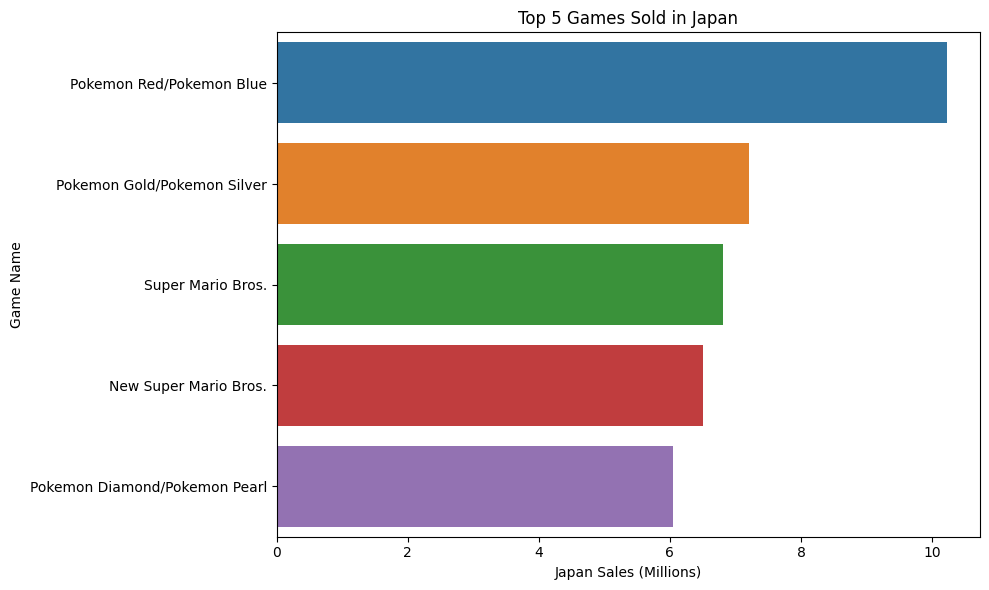


Top 5 Games Sold in Japan:
  Ranking                          Name Platform  Year        Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
       5      Pokemon Red/Pokemon Blue       GB  1996 Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37
      13   Pokemon Gold/Pokemon Silver       GB  1999 Role-Playing  Nintendo      9.00      6.18      7.20         0.71         23.10
       2             Super Mario Bros.      NES  1985     Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
       7         New Super Mario Bros.       DS  2006     Platform  Nintendo     11.38      9.23      6.50         2.90         30.01
      21 Pokemon Diamond/Pokemon Pearl       DS  2006 Role-Playing  Nintendo      6.42      4.52      6.04         1.37         18.36


In [14]:
top_5_jp = df.sort_values(by='JP_Sales', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_jp, x='JP_Sales', y='Name', hue='Name')
plt.title('Top 5 Games Sold in Japan')
plt.xlabel('Japan Sales (Millions)')
plt.ylabel('Game Name')
plt.tight_layout()
plt.show()
print("\nTop 5 Games Sold in Japan:\n", top_5_jp.to_string(index=False))

# **6. Top sales globally based on genre**

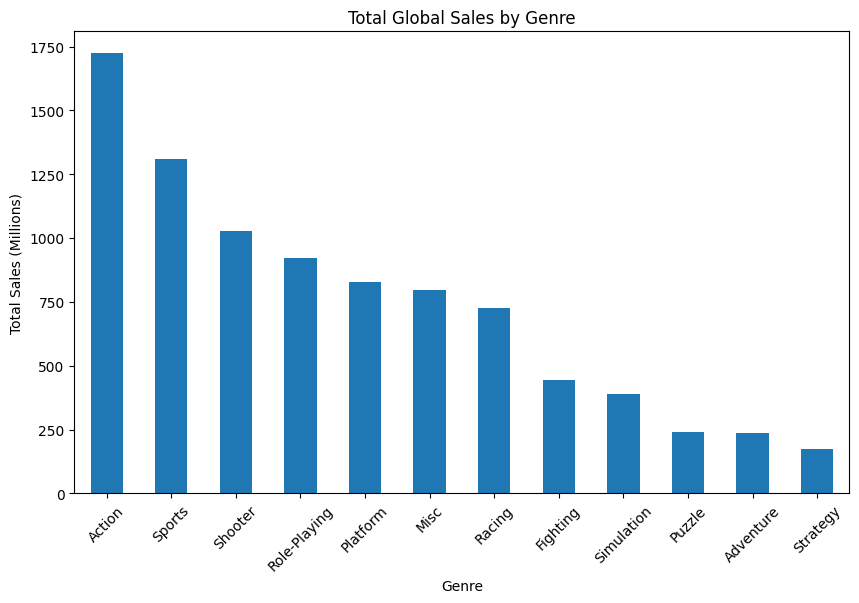


Total Global Sales by Genre:
 Genre
Action          1722.88
Sports          1309.24
Shooter         1026.20
Role-Playing     923.84
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       390.16
Puzzle           242.22
Adventure        234.80
Strategy         173.43
Name: Global_Sales, dtype: float64


In [15]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)
plt.show()
print("\nTotal Global Sales by Genre:\n", genre_sales)

# **7. Average sales based on publisher (top 10)**

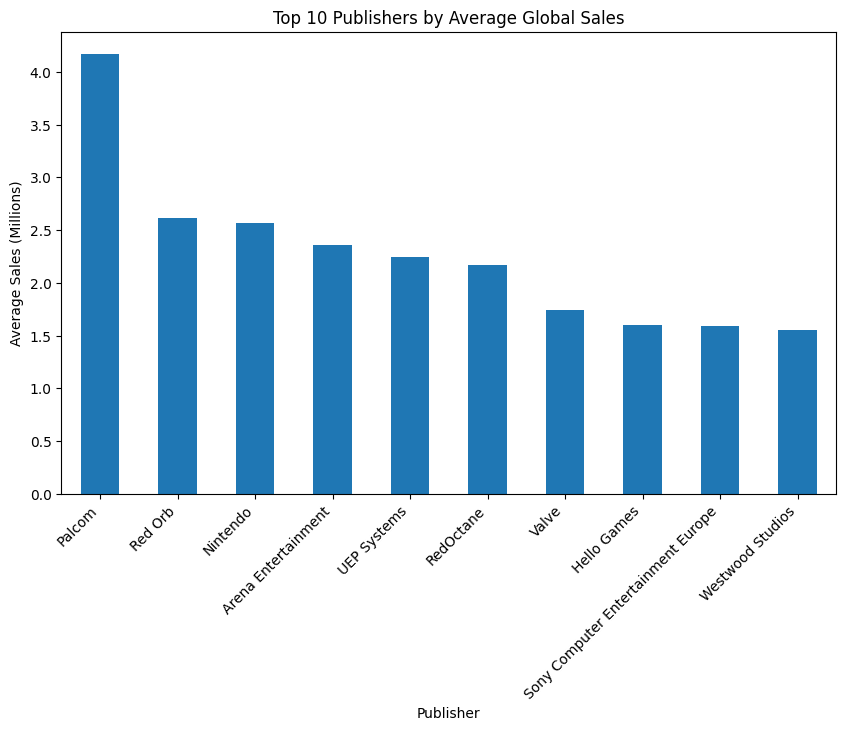


Top 10 Publishers by Average Global Sales:
 Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.563836
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64


In [16]:
publisher_avg_sales = df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
publisher_avg_sales.plot(kind='bar')
plt.title('Top 10 Publishers by Average Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Average Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()
print("\nTop 10 Publishers by Average Global Sales:\n", publisher_avg_sales)

# **8. Games released based on year**

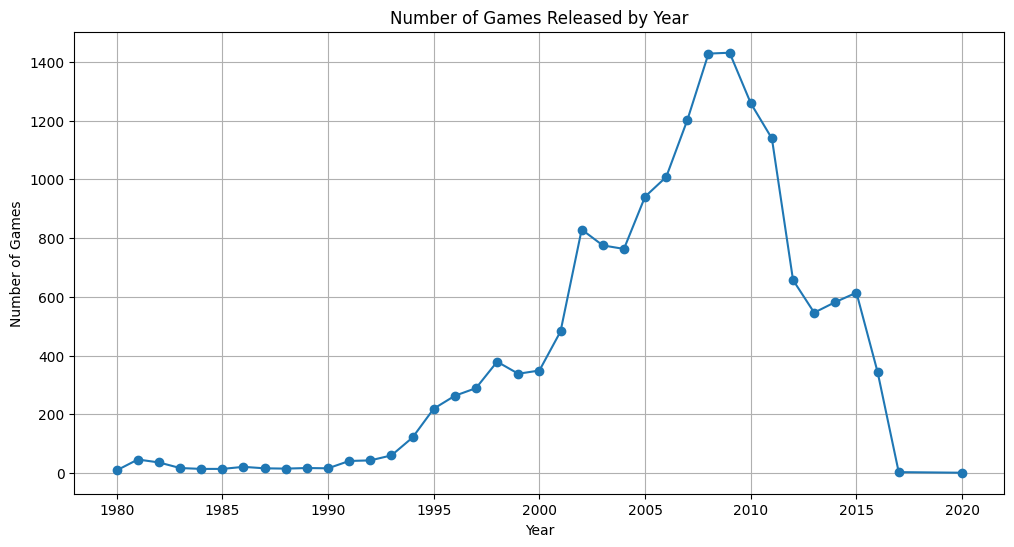


Games Released by Year:
 Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1431
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
2016     344
2017       3
2020       1
dtype: int64


In [17]:
games_per_year = df.groupby('Year').size()
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='line', marker='o')
plt.title('Number of Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()
print("\nGames Released by Year:\n", games_per_year)

# **9. Top 5 selling games in 2008**

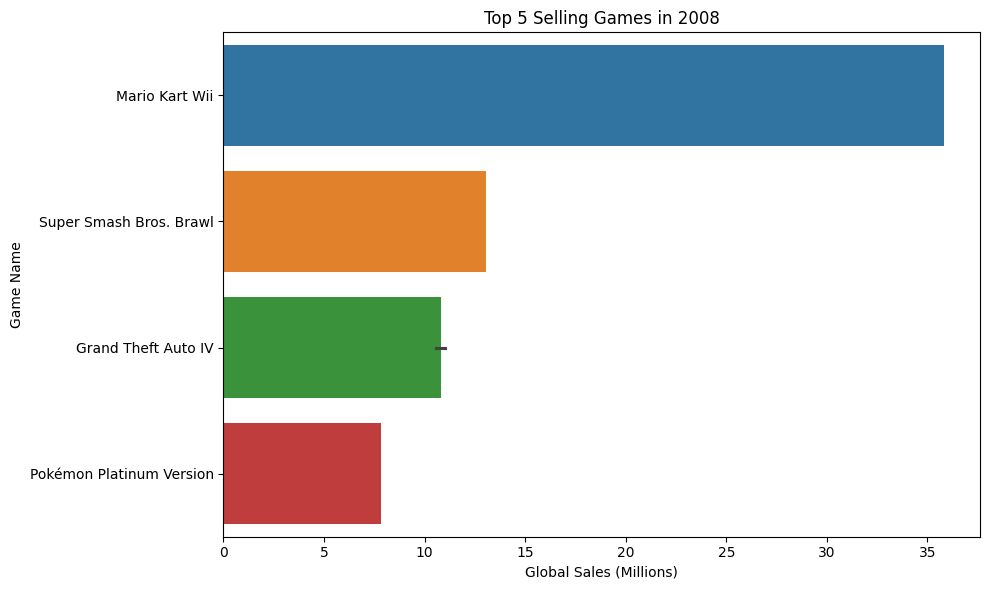


Top 5 Selling Games in 2008:
  Ranking                     Name Platform  Year        Genre            Publisher  Global_Sales
       3           Mario Kart Wii      Wii  2008       Racing             Nintendo         35.82
      40  Super Smash Bros. Brawl      Wii  2008     Fighting             Nintendo         13.04
      52      Grand Theft Auto IV     X360  2008       Action Take-Two Interactive         11.02
      57      Grand Theft Auto IV      PS3  2008       Action Take-Two Interactive         10.57
      89 Pokémon Platinum Version       DS  2008 Role-Playing             Nintendo          7.84


In [18]:
top_5_2008 = df[df['Year'] == 2008][['Ranking', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_2008, x='Global_Sales', y='Name', hue='Name')
plt.title('Top 5 Selling Games in 2008')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game Name')
plt.tight_layout()
plt.show()
print("\nTop 5 Selling Games in 2008:\n", top_5_2008.to_string(index=False))

# **10. Top 5 publishers by total global sales per genre**

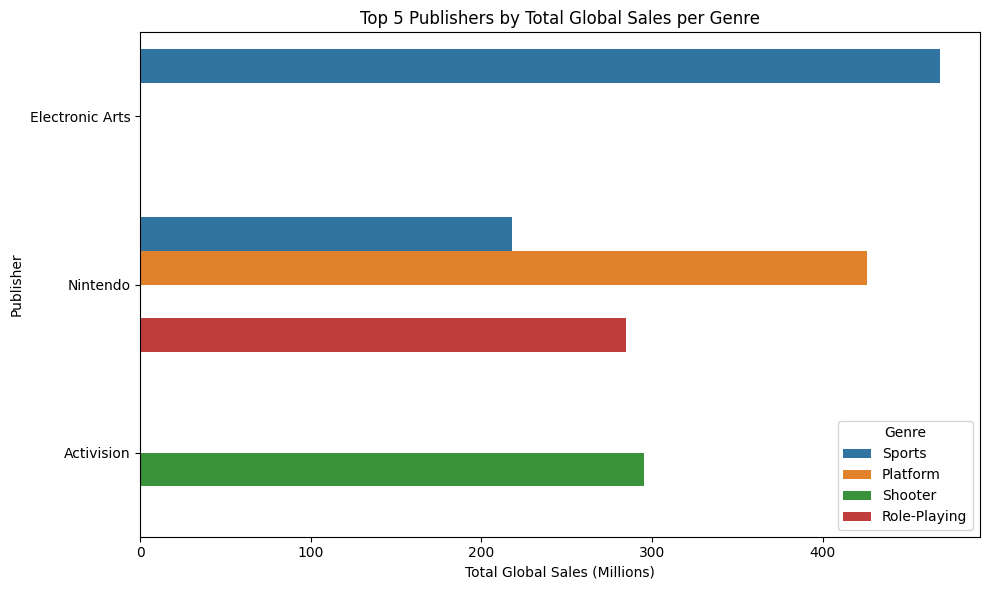


Top 5 Publishers by Total Global Sales per Genre:
       Publisher        Genre  Global_Sales
Electronic Arts       Sports        468.69
       Nintendo     Platform        426.18
     Activision      Shooter        295.40
       Nintendo Role-Playing        284.57
       Nintendo       Sports        218.01


In [19]:
publisher_genre_sales = df.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=publisher_genre_sales, x='Global_Sales', y='Publisher', hue='Genre')
plt.title('Top 5 Publishers by Total Global Sales per Genre')
plt.xlabel('Total Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()
print("\nTop 5 Publishers by Total Global Sales per Genre:\n", publisher_genre_sales.to_string(index=False))

# **11. Top 5 publishers by total global sales (excluding genre)**

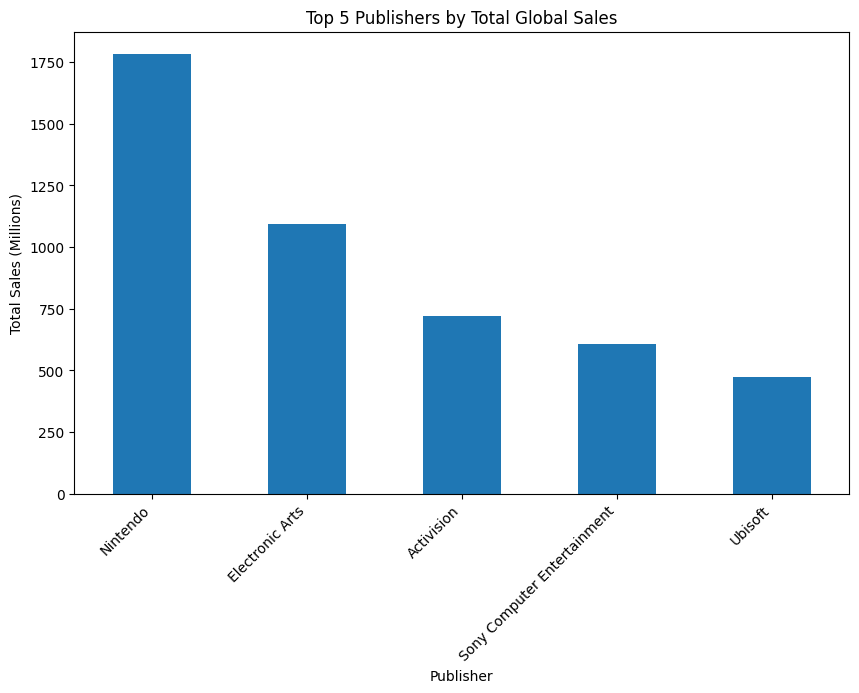


Top 5 Publishers by Total Global Sales:
 Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
Name: Global_Sales, dtype: float64


In [20]:
publisher_total_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
publisher_total_sales.plot(kind='bar')
plt.title('Top 5 Publishers by Total Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()
print("\nTop 5 Publishers by Total Global Sales:\n", publisher_total_sales)

# **12. Top 5 publishers by total sales per region**

<Figure size 1000x600 with 0 Axes>

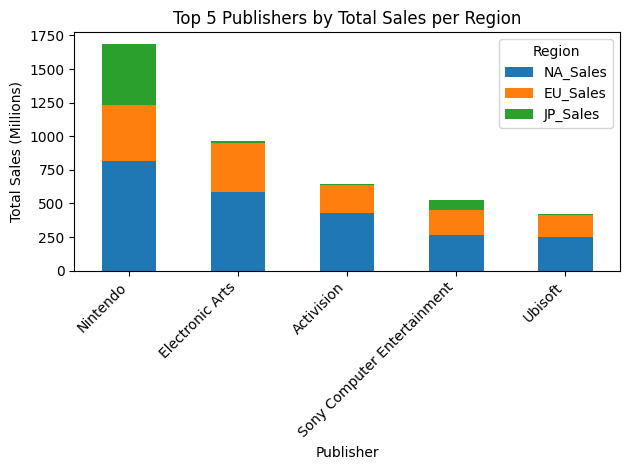


Top 5 Publishers by Total Sales per Region:
                              NA_Sales  EU_Sales  JP_Sales  Global_Sales
Publisher                                                              
Nintendo                       815.75    418.30    454.99       1784.43
Electronic Arts                584.22    367.38     13.98       1093.39
Activision                     426.01    213.72      6.54        721.41
Sony Computer Entertainment    265.22    187.55     74.10        607.28
Ubisoft                        252.81    163.03      7.33        473.54


In [21]:
publisher_region_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False).head(5)
plt.figure(figsize=(10, 6))
publisher_region_sales[['NA_Sales', 'EU_Sales', 'JP_Sales']].plot(kind='bar', stacked=True)
plt.title('Top 5 Publishers by Total Sales per Region')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()
print("\nTop 5 Publishers by Total Sales per Region:\n", publisher_region_sales)

# **13. Sales trend over years**

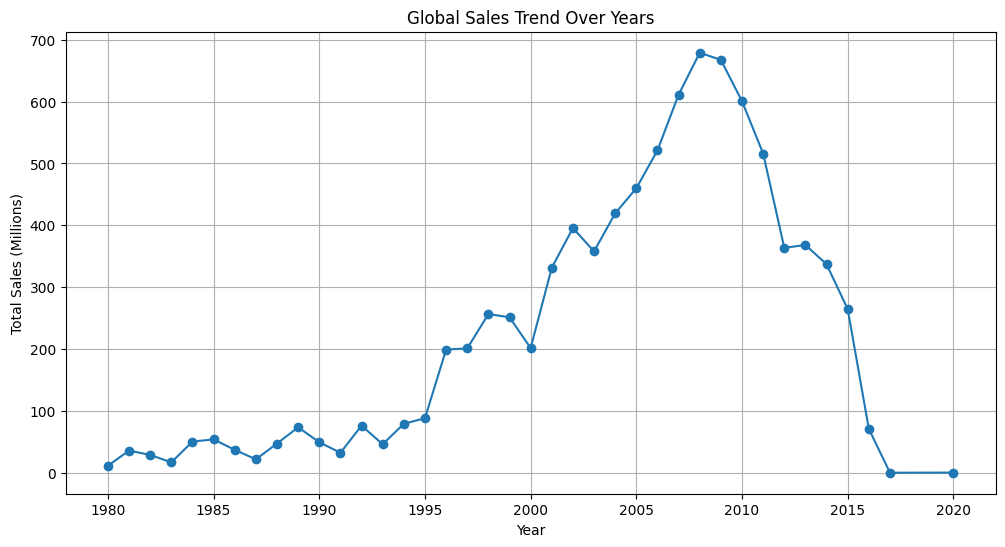


Global Sales Trend Over Years:
 Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    419.31
2005    459.94
2006    521.04
2007    611.13
2008    678.90
2009    667.30
2010    600.45
2011    515.99
2012    363.54
2013    368.11
2014    337.05
2015    264.44
2016     70.93
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64


In [22]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', marker='o')
plt.title('Global Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.show()
print("\nGlobal Sales Trend Over Years:\n", yearly_sales)